In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
from sklearn.decomposition import PCA, IncrementalPCA
from tqdm import tqdm
pd.options.mode.chained_assignment = None 
%matplotlib inline

In [2]:
data = scipy.io.loadmat('munsell400_700_5.mat')

munsell = data['munsell']
wavelength = np.arange(400,700+5,5)

df_fluorescent = pd.read_excel("Fluorescents.xls", skiprows = 1)
df_fluorescent.rename(columns={'Unnamed: 0':'wavelength'}, inplace=True)

df_fluorescentF1 = df_fluorescent[['wavelength', 'F1']]
df_fluorescentF1.rename(columns = {'F1':'illumination'}, inplace = True)

df_fluorescentF1 = df_fluorescentF1[(df_fluorescentF1['wavelength'] >= 400) & (df_fluorescentF1['wavelength'] <= 700)]
df_fluorescentF1 = df_fluorescentF1.reset_index(inplace=False)

In [3]:
color_signal = []
for i,j in enumerate(munsell):
    color_signal.append(j * df_fluorescentF1.illumination[i])
color_signal = np.array(color_signal)

In [4]:
pca = PCA(len(color_signal))
pca.fit(color_signal.T)

mean = pca.mean_
evecs = pca.components_
evals = pca.explained_variance_ratio_

explained = pca.explained_variance_ratio_.cumsum() * 100

In [5]:
accuracy = 95
k = np.argmax(explained>accuracy)
print("Number of components explaining 95% variance: "+ str(k+1))

Number of components explaining 95% variance: 3


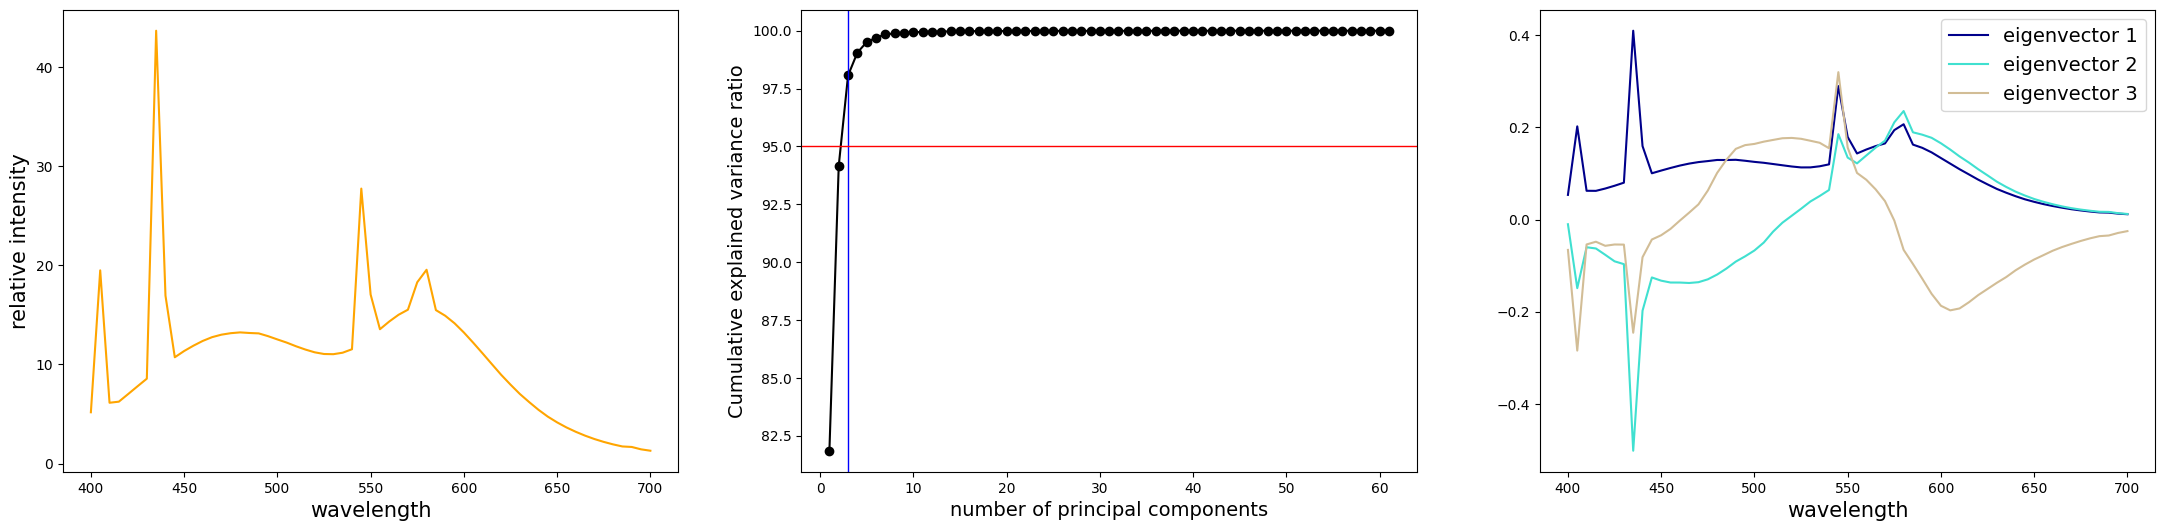

In [6]:
plt.figure(figsize = (9*3,6))

plt.subplot(131)
plt.plot(wavelength, df_fluorescentF1.illumination, color = 'orange')
#plt.ylim(-0.05,1.05)
plt.ylabel('relative intensity', fontsize = 15)
plt.xlabel('wavelength',fontsize = 15)

plt.subplot(132)
plt.plot(np.arange(0,len(munsell))+1, explained, 'o-', color = 'black')
plt.ylabel('Cumulative explained variance ratio', fontsize = 14)
plt.xlabel('number of principal components', fontsize = 14)
plt.axvline(x=k+1, color="blue", linewidth = 1)
plt.axhline(y=accuracy, color="red", linewidth = 1)

plt.subplot(133)
labels = ['eigenvector 1', 'eigenvector 2', 'eigenvector 3']
colors = ['#00008B', 'Turquoise', '#D2BD96']
for i in range(k+1):
    pc = evecs[i]
    plt.plot(wavelength, pc, color = colors[i], label = labels[i])
plt.legend(fontsize = 14)
plt.xlabel('wavelength',fontsize = 15)
plt.show()